# Perceptron Simple

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


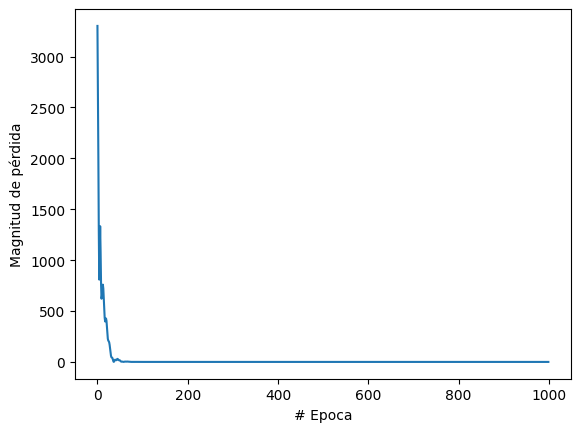

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 76ms/step
El resultado es [[211.74742]] fahrenheit!


In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.38607508,  0.32693678, -0.13777421]], dtype=float32), array([ 3.5680585,  3.3105204, -3.133284 ], dtype=float32)]
[array([[ 0.3159724 ,  0.497894  ,  1.4662994 ],
       [ 0.42306972,  0.12943171,  0.9358746 ],
       [-0.66160613,  0.48303017, -0.40916672]], dtype=float32), array([ 3.2270484 , -0.34042984,  3.3876402 ], dtype=float32)]
[array([[ 1.1905859 ],
       [-0.03142803],
       [ 1.4915105 ]], dtype=float32), array([3.2543457], dtype=float32)]


# Veamos un ejemplo diferente

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [ ]:

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data  # Características: largo y ancho del sépalo, largo y ancho del pétalo
y = iris.target  # Etiquetas de especies




In [ ]:
# Convertir el dataset Iris a DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

# Muestra las primeras filas del DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Codificación one-hot de las etiquetas
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Crear el modelo de red neuronal
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(4,), activation='relu'),  # Capa oculta con 3 neuronas
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 neuronas
])


In [ ]:

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Entrenamiento del modelo
historial = modelo.fit(X_train, y_train, epochs=1000, verbose=False)


In [ ]:

# Evaluar el modelo
evaluacion = modelo.evaluate(X_test, y_test)
print("\nExactitud en el conjunto de prueba:", evaluacion[1])


2/2 [==============================] - 0s 8ms/step - loss: 0.0948 - accuracy: 0.9778

Exactitud en el conjunto de prueba: 0.9777777791023254


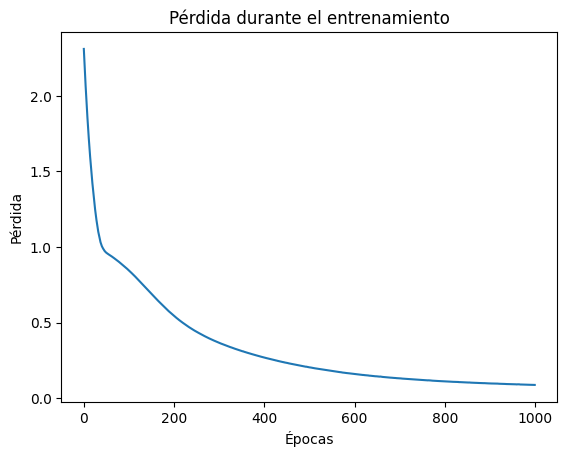

In [ ]:

# Visualización del historial de entrenamiento
plt.plot(historial.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

2/2 [==============================] - 0s 4ms/step


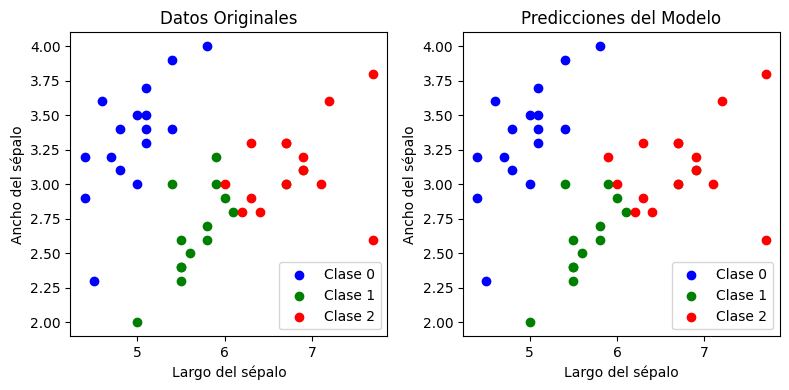

In [ ]:
# Preparar datos para graficar
def plot_iris(data, classes, title):
    # Colores para las tres clases
    colors = ['blue', 'green', 'red']

    for i in range(3):
        subset = data[classes == i]
        plt.scatter(subset[:, 0], subset[:, 1], c=colors[i], label=f'Clase {i}')

    plt.xlabel('Largo del sépalo')
    plt.ylabel('Ancho del sépalo')
    plt.title(title)
    plt.legend()

# Graficar los resultados
plt.figure(figsize=(8, 4))

# Graficar los datos originales
plt.subplot(1, 2, 1)
plot_iris(X_test[:, :2], np.argmax(y_test, axis=1), 'Datos Originales')

# Graficar las predicciones del modelo
plt.subplot(1, 2, 2)
plot_iris(X_test[:, :2], np.argmax(modelo.predict(X_test), axis=1), 'Predicciones del Modelo')

plt.tight_layout()
plt.show()